In [44]:
%%time

from qutip import mesolve, basis, jmat, Options, expect, Qobj
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros
import numpy as np
import matplotlib.pyplot as plt
import h5py

plt.rcParams.update({"figure.figsize": (12,8),"text.usetex": True,
    "font.family": "sans-serif","font.size": 15,"font.sans-serif": ["Computer Modern"]})

def drive(t, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    return h * np.sin(w*t) + h0

def get_hamiltonians(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/(N-1)                                     
    H0 = kn * sz **2 
    H1 = 2 * sx
    return H0,H1

def sys_evolve(w,N,opts):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    T = 2 * np.pi/w
    h = jn_zeros(0,5)[-1]* w / 4.0
    params = {'h0':np.pi/32, 'h':h,'omega':w, 'N':N} 
    H0, H1 = get_hamiltonians(N)
    H = [H0,[H1,drive]]
    en, sts = sx.eigenstates() 
    rho0 = sts[0]
    times = np.linspace(0,75*T, 500)
    hbar = []
    out = mesolve(H, rho0, times, [], [], args = params, options=opts)
    psi_ts = out.states
    
    for i,t in enumerate(times):
        Ht = H0 + H1 * drive(t, params)
        hbar.append(expect(Qobj(Ht),psi_ts[i]))
    hbar = (np.array(hbar)/N).reshape(len(times),1)
    
    
    
    return hbar.real, (times/(2*np.pi/w)).reshape(len(times),1), w

if __name__ == '__main__':
    nprocs = 12
    N = 2
    o1 = np.linspace(0.29, 1.58, 15)
    o2 = np.linspace(1.6, 2.5, 15)
    o3 = np.linspace(2.8, 4.38, 15)
    o4 = np.linspace(4.5, 9.4, 15)
    o5 = np.linspace(9.5, 20.0, 15)
    o6 = np.linspace(20.1, 50.0, 9)
    
    o7 = np.linspace(0.1, 2, 15)
    o8 = np.linspace(1.6, 2.5, 15)
    o9 = np.linspace(2.8, 4.38, 15)
    
    o10 = np.linspace(0.05, 2, 10)

    omega_vals = np.concatenate((o1, o2, o3, o4, o5, o6))
    #omega_vals = np.concatenate((o7,o8,o9))
    #omega_vals = o10
    
    p = Pool(processes = nprocs)
    print("running for TSS spin N=",N, 'nprocs=',nprocs," !")
    opts = Options(nsteps=1e5, num_cpus=nprocs, openmp_threads=1, atol=1e-12, rtol=1e-14)
    data = np.array(p.starmap(sys_evolve,tqdm([(w,N, opts) for w in omega_vals])))

running for TSS spin N= 2 nprocs= 12  !


100%|████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 20350.11it/s]


CPU times: user 36.9 ms, sys: 131 ms, total: 168 ms
Wall time: 17.9 s


<timed exec>:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [47]:
import h5py

hbars, timess , ws =[],[], []
for i,w in enumerate(omega_vals):
    hbars.append(data[i][0][:,0])
    timess.append(data[i][1][:,0])
    ws.append(data[i][2])

In [48]:
fname = 'test.hdf5'

with h5py.File(fname,'w') as hf:
    hbar_dset = hf.create_dataset('hbars', np.shape(np.array(hbars)), data = np.array(hbars))
    times_dset = hf.create_dataset('times', np.shape(np.array(times)), data = np.array(times))
    ws = hf.create_dataset('ws', np.shape(np.array(ws)), data = np.array(ws))
    hf.attrs['N'] = N

In [55]:
with h5py.File(fname, "r") as f:
    hbar = f['hbars'][()]
    times = f['times'][()]
    omega_vals = f['ws'][()]
    N = f.attrs['N']

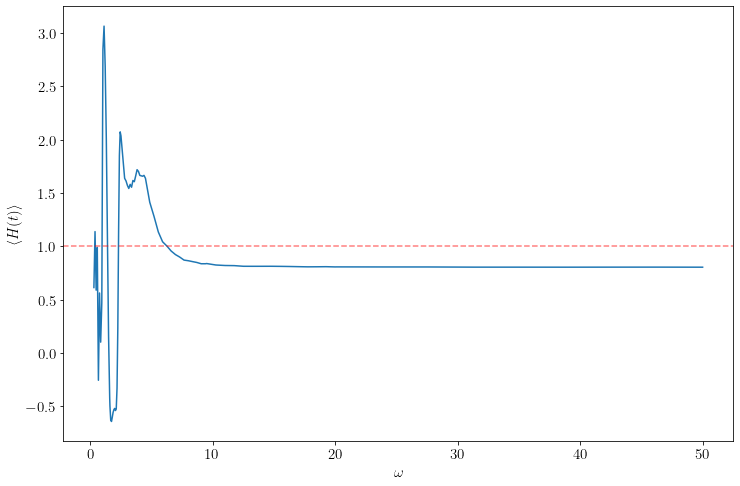

In [ ]:
hbaravg1 =[]
for i,w in enumerate(omega_vals):
    hbar1 = hbar1 = times[i]

    [i]
    timeshbaravg1.append(np.average(hbar1))
plt.plot(omega_vals,hbaravg1)
plt.xlabel(r'$\omega$')
plt.ylabel(r"$\langle H(t) \rangle$")
#plt.xlim(-1,10)
plt.axhline(y=1.0,color='r', linestyle='--', alpha=0.5)
plt.show()

#  Multiple Ns

In [94]:
from qutip import mesolve, basis, jmat, Options, expect, Qobj
from multiprocessing import Pool
from tqdm import tqdm
from scipy.special import jn_zeros
import numpy as np
import matplotlib.pyplot as plt
import h5py


plt.rcParams.update({"figure.figsize": (12,8),"text.usetex": True,
    "font.family": "sans-serif","font.size": 15,"font.sans-serif": ["Computer Modern"]})

def drive(t, args):
    w = args['omega']
    h = args['h']
    h0 = args['h0']
    return h * np.sin(w*t) + h0

def get_hamiltonians(N):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    kn =  2.0/(N-1)                                     
    H0 = kn * sz **2 
    H1 = 2 * sx
    return H0,H1

def sys_evolve(w,N,opts):
    sx,sy,sz = jmat(N,"x"),jmat(N,"y"),jmat(N,"z")
    T = 2 * np.pi/w
    h = jn_zeros(0,5)[1]* w / 4.0
    params = {'h0':np.pi/32, 'h':h,'omega':w, 'N':N} 
    H0, H1 = get_hamiltonians(N)
    H = [H0,[H1,drive]]
    en, sts = sx.eigenstates() 
    rho0 = sts[0]
    times = np.linspace(0,75*T, 1000)
    hbar = []
    out = mesolve(H, rho0, times, [], [], args = params, options=opts)
    psi_ts = out.states
    
    for i,t in enumerate(times):
        Ht = H0 + H1 * drive(t, params)
        hbar.append(expect(Qobj(Ht),psi_ts[i]))
    hbar = (np.array(hbar)/N).reshape(len(times),1)
    return hbar.real, (times/(2*np.pi/w)).reshape(len(times),1), w

if __name__ == '__main__':
    nprocs = 32
    Ns = [20,50]
    
    o1 = np.linspace(0.29, 1.58, 15)
    o2 = np.linspace(1.6, 2.5, 17)
    o3 = np.linspace(2.6, 4.38, 19)
    o4 = np.linspace(4.4, 9.4, 20)
    o5 = np.linspace(9.45, 20.0, 20)
    o6 = np.linspace(20.1, 40.0, 5)
    omega_vals = np.concatenate((o1, o2, o3, o4, o5, o6))

    for N in Ns:
        p = Pool(processes = nprocs)
        print("running for TSS spin N=",N, 'nprocs=',nprocs," !")
        opts = Options(nsteps=1e5, num_cpus=nprocs, openmp_threads=1, atol=1e-12, rtol=1e-14)
        data = np.array(p.starmap(sys_evolve,tqdm([(w,N, opts) for w in omega_vals])))        
        
        hbars, times , ws =[],[], []
        for i,w in enumerate(omega_vals):
            hbars.append(data[i][0][:,0])
            times.append(data[i][1][:,0])
            ws.append(data[i][2])
            
        fname = 'long_hbar_avg_N' + str(N) + '.hdf5'

        with h5py.File(fname,'w') as hf:
            hbar_dset = hf.create_dataset('hbars', np.shape(np.array(hbars)), data = np.array(hbars))
            times_dset = hf.create_dataset('times', np.shape(np.array(times)), data = np.array(times))
            ws = hf.create_dataset('ws', np.shape(np.array(ws)), data = np.array(ws))
            hf.attrs['N'] = N

running for TSS spin N= 2 nprocs= 12  !


100%|████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 23740.78it/s]
/tmp/ipykernel_10477/1323669855.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(p.starmap(sys_evolve,tqdm([(w,N, opts) for w in omega_vals])))


running for TSS spin N= 3 nprocs= 12  !


100%|████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 25608.63it/s]


In [6]:
!ls long_hbar_avg_N* > datafiles.txt

In [7]:
! cat datafiles.txt

long_hbar_avg_N100.hdf5
long_hbar_avg_N20.hdf5
long_hbar_avg_N50.hdf5


long_hbar_avg_N20.hdf5
long_hbar_avg_N50.hdf5


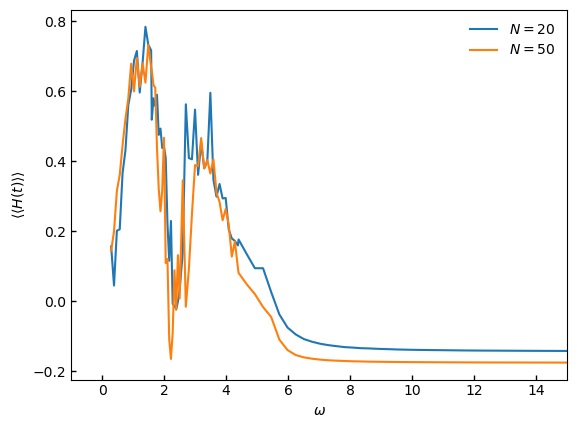

In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

with open('datafiles.txt') as df:
    lines = df.readlines()
    xx = len(lines)
    for xxi in range(xx):
        filename = lines[xxi][:-1]
        print(filename)
        
        with h5py.File(filename, "r") as f:
            hbar = f['hbars'][()]
            times = f['times'][()]
            omega_vals = f['ws'][()]
            N = f.attrs['N']
            
            hbaravg1 =[]
            for i,w in enumerate(omega_vals):
                hbar1 = hbar[i]
                times1 = times[i]

                hbaravg1.append(np.average(hbar1))
            plt.plot(omega_vals,hbaravg1, label=fr"$N={N:3d}$")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$\langle\langle H(t)\rangle\rangle$")
plt.xlim(-1,15)
#plt.axhline(y=1.0,color='r', linestyle='--', alpha=0.5)
plt.legend(frameon=False)
plt.tick_params(which='both', axis='x', direction='in', width= 1.0)
plt.tick_params(which='both', axis='y', direction='in', width= 1.0)
plt.savefig('long_hbar.jpg', dpi= 300)
plt.show()